### Edgar Moises Hernandez-Gonzalez
#### 20/01/20-04/03/20
#### Espectrograma sin y con STFFT de una señal de 4 segundos de EEG a 250Hz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
#canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 7000:8000] #canal C3
canal = pd.read_csv("MI-EEG-A01T.csv", header=None).iloc[:, 11000:12000] #canal C4 (usar este)

In [3]:
# Señal EEG del sujeto 1
# 4 segundos con fs=250Hz

fs = 250
time = np.arange(0, 4, 1/fs)
sig = canal.iloc[2] #la muestra 2 es mano derecha
sig.shape

(1000,)

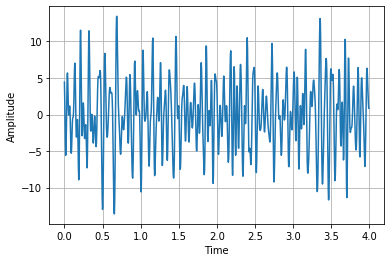

In [4]:
plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

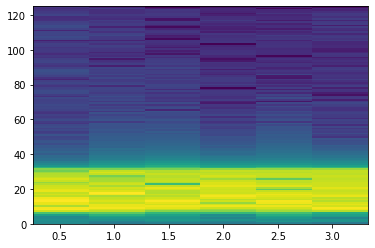

In [5]:
powerSpectrum, freqenciesFound, t2, imageAxis = plt.specgram(sig, Fs=fs)
plt.show()

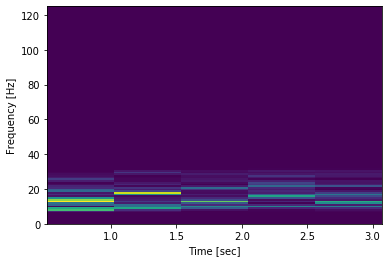

In [6]:
# Espectrograma con plt.specgram
plt.pcolormesh(t2, freqenciesFound, powerSpectrum)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

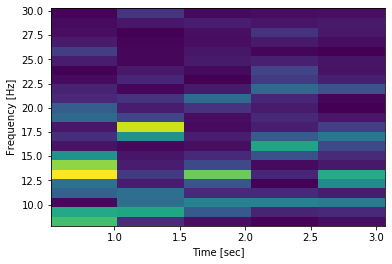

In [7]:
# Espectrograma con plt.specgram (Zoom)
plt.pcolormesh(t2, freqenciesFound, powerSpectrum)
plt.axis([0.512, 3.072, 7.81, 30.27])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

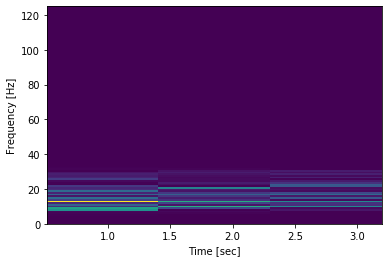

In [8]:
# Espectrograma con spectrogram, STFFT
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

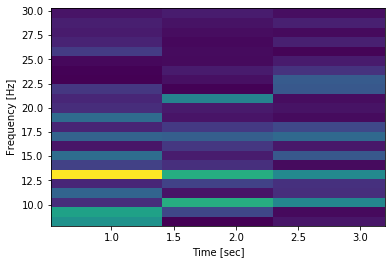

In [9]:
# Espectrograma con spectrogram, STFFT (Zoom)
f, t, Sxx = spectrogram(sig, fs)
plt.pcolormesh(t, f, Sxx)
plt.axis([0.512, 3.2, 7.81, 30.27])
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [10]:
print("Normal", powerSpectrum.shape)
print("STFFT", Sxx.shape)

Normal (129, 6)
STFFT (129, 4)


In [11]:
print("Variables de STFFT")
print("Frecuencia", f.shape)
print(f)
print("Tiempo", t.shape)
print(t)

Variables de STFFT
Frecuencia (129,)
[  0.          0.9765625   1.953125    2.9296875   3.90625     4.8828125
   5.859375    6.8359375   7.8125      8.7890625   9.765625   10.7421875
  11.71875    12.6953125  13.671875   14.6484375  15.625      16.6015625
  17.578125   18.5546875  19.53125    20.5078125  21.484375   22.4609375
  23.4375     24.4140625  25.390625   26.3671875  27.34375    28.3203125
  29.296875   30.2734375  31.25       32.2265625  33.203125   34.1796875
  35.15625    36.1328125  37.109375   38.0859375  39.0625     40.0390625
  41.015625   41.9921875  42.96875    43.9453125  44.921875   45.8984375
  46.875      47.8515625  48.828125   49.8046875  50.78125    51.7578125
  52.734375   53.7109375  54.6875     55.6640625  56.640625   57.6171875
  58.59375    59.5703125  60.546875   61.5234375  62.5        63.4765625
  64.453125   65.4296875  66.40625    67.3828125  68.359375   69.3359375
  70.3125     71.2890625  72.265625   73.2421875  74.21875    75.1953125
  76.171875   

Normal


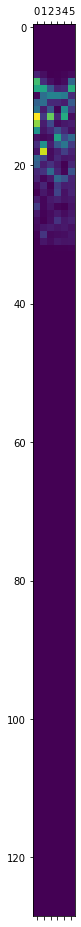

In [12]:
print("Normal")
plt.matshow(powerSpectrum)
plt.show()

STFFT


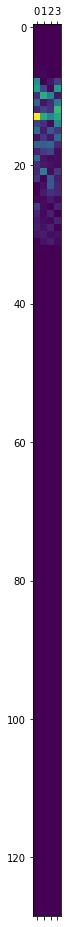

In [13]:
print("STFFT")
plt.matshow(Sxx)
plt.show()

Normal
(24, 6)


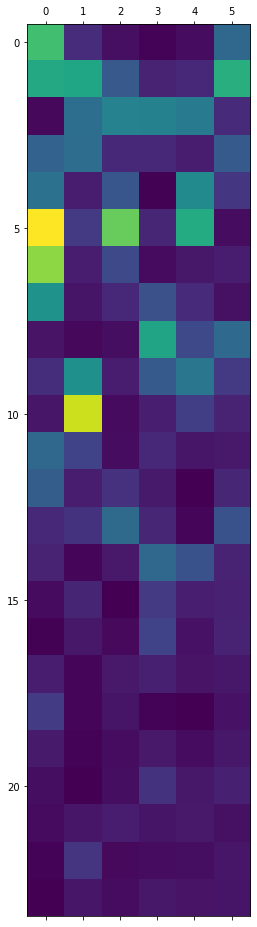

In [14]:
print("Normal")
x2 = powerSpectrum[8:32, :]
print(x2.shape)
plt.matshow(x2)
plt.show()

STFFT
(24, 4)


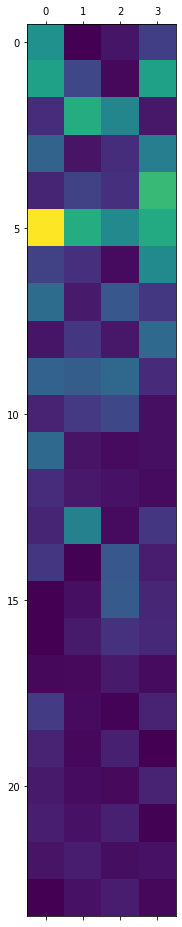

In [15]:
print("STFFT")
x = Sxx[8:32, :]
print(x.shape)
plt.matshow(x)
plt.show()

STFFT a escala de grises, esto es lo que se va a clasificar


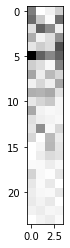

In [16]:
print("STFFT a escala de grises, esto es lo que se va a clasificar")
plt.imshow(x, cmap=plt.cm.binary)
plt.show()

In [17]:
x

array([[2.78097210e+00, 8.44739472e-03, 3.20460416e-01, 1.03064098e+00],
       [3.14644215e+00, 1.17556876e+00, 1.31405014e-01, 3.15504328e+00],
       [6.93553779e-01, 3.41941954e+00, 2.52126436e+00, 3.50427749e-01],
       [1.75777474e+00, 2.83598590e-01, 7.23527291e-01, 2.35842085e+00],
       [5.83139739e-01, 1.09568829e+00, 7.60447259e-01, 3.73417775e+00],
       [5.50521693e+00, 3.40785546e+00, 2.59655615e+00, 3.35971969e+00],
       [1.06342928e+00, 7.52373660e-01, 1.67460525e-01, 2.62383525e+00],
       [1.94923522e+00, 4.10392922e-01, 1.50193377e+00, 8.89172715e-01],
       [3.22403989e-01, 8.68228957e-01, 3.61818450e-01, 1.87495525e+00],
       [1.73736637e+00, 1.63658317e+00, 1.86328009e+00, 6.68661795e-01],
       [5.38008550e-01, 9.13448085e-01, 1.18649301e+00, 2.23506742e-01],
       [1.89248237e+00, 2.89375901e-01, 1.55569136e-01, 2.27411018e-01],
       [6.98146983e-01, 3.76379685e-01, 2.70354832e-01, 1.65983766e-01],
       [5.84293322e-01, 2.42343179e+00, 1.74235640e